In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('./scraped_data/0.csv')

In [7]:
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Manchester City,38,29,6,3,99,26,73,93,2.45,89.0,27.2,61.9,1.63,52774,Kevin De Bruyne - 15,Ederson,→ Champions League via league finish
1,2,Liverpool,38,28,8,2,94,26,68,92,2.42,89.2,34.3,55.0,1.45,53352,Mohamed Salah - 23,Alisson,→ Champions League via league finish
2,3,Chelsea,38,21,11,6,76,33,43,74,1.95,67.2,36.0,31.3,0.82,36443,Mason Mount - 11,Edouard Mendy,→ Champions League via league finish
3,4,Tottenham,38,22,5,11,69,40,29,71,1.87,65.1,39.4,25.8,0.68,56523,Son Heung-min - 23,Hugo Lloris,→ Champions League via league finish
4,5,Arsenal,38,22,3,13,61,48,13,69,1.82,59.9,47.1,12.8,0.34,59665,Bukayo Saka - 11,Aaron Ramsdale,→ Europa League via league finish


### Splitting Top Scorer Column into Scorer and Goals

In [8]:
df[['Top Scorer (Name)', 'Top Scorer (Goals)']] = df['Top Team Scorer'].str.split(' - ', 1, expand=True)
df.drop(labels=['Top Team Scorer','Notes'],axis=1,inplace=True)

In [9]:
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Goalkeeper,Top Scorer (Name),Top Scorer (Goals)
0,1,Manchester City,38,29,6,3,99,26,73,93,2.45,89.0,27.2,61.9,1.63,52774,Ederson,Kevin De Bruyne,15
1,2,Liverpool,38,28,8,2,94,26,68,92,2.42,89.2,34.3,55.0,1.45,53352,Alisson,Mohamed Salah,23
2,3,Chelsea,38,21,11,6,76,33,43,74,1.95,67.2,36.0,31.3,0.82,36443,Edouard Mendy,Mason Mount,11
3,4,Tottenham,38,22,5,11,69,40,29,71,1.87,65.1,39.4,25.8,0.68,56523,Hugo Lloris,Son Heung-min,23
4,5,Arsenal,38,22,3,13,61,48,13,69,1.82,59.9,47.1,12.8,0.34,59665,Aaron Ramsdale,Bukayo Saka,11


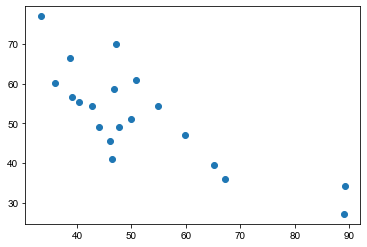

In [10]:
plt.scatter(df['xG'],df['xGA'])

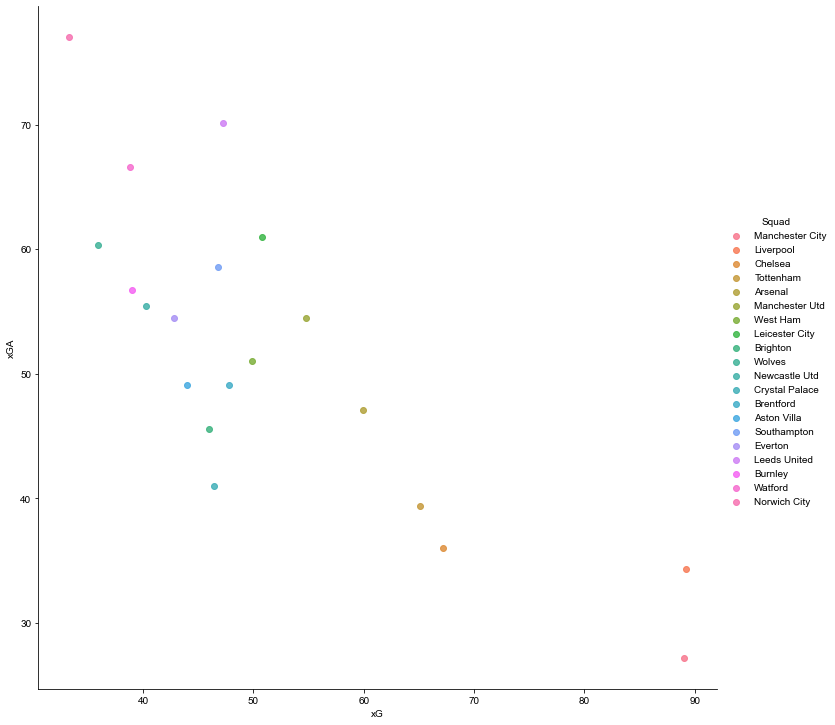

In [24]:
ax = sns.lmplot(x='xG',y='xGA',hue='Squad',data=df,fit_reg=False,height=10,aspect=1)

Text(0.5, 0, 'xGD vs aGD')

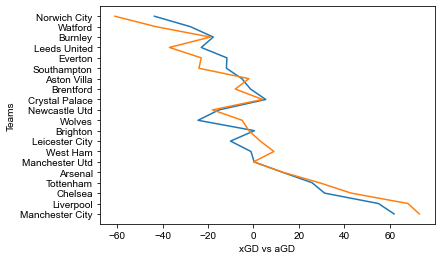

In [10]:
plt.plot(df['xGD'],df['Squad'])
plt.plot(df['GD'],df['Squad'])
plt.ylabel("Teams")
plt.xlabel("xGD vs aGD")